# **Titanic Data set**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
#create variables for our test and train file
test_file = 'test.csv'
train_file = 'train.csv'

def load_data(filename):
    return pd.read_csv(filename)

In [3]:
train_data = load_data(train_file)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **The Objective**
The objective is to be able to predict whether or not a passenger will survive the titanic given these set of features.

# **The data set**

The data set is labelled which screams supervised learning. This also seems to be a classification problem , survive or not survive, and some of the supervised classification algorithms are:
* Logisitic Regression
* Decision Trees, Random Forest
* Support Vector Machines
* k-NN

Maybe we can try all of them and create some ensemble method

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# **Features**

* The Cabin feature could be useful because the location of these Cabins could have helped a person survive but there are too many missing values.
* Fare may not be very important because we already have a Pclass feature. Higher fare probably means a higher class.
* Ticket, not sure what this feature exactly tells us. Is it the ticket number for that person?
* Name attribute might not be important either. Maybe if there were certain rich families on board, but Sex is probably more important to survival.
* Embarked may not be important either since the Titanic sunk in the ocean and not at a particular dock.
* Need to get rid of PassengerId

## **Theoretically important**
* Sex
* Pclass
* Age (has missing values)

## **Unsure**

The features SibSp and Parch may be relevent. If the person had a sibling/spouse on the ship it could affect their survival. Same if the person had a parent or child with them on the ship.

## **Check**
 
* The relationship of the theoretically important features. Correlation matrix/heat map.


In [7]:
#let's get a feel for the weird features. Cabin, Ticket, Fare.
train_data['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
F2             3
F33            3
E101           3
D33            2
C83            2
D35            2
C78            2
C52            2
B49            2
F G73          2
C123           2
B58 B60        2
E8             2
B35            2
B5             2
E25            2
C125           2
D26            2
E33            2
B22            2
D36            2
C93            2
E24            2
D20            2
C124           2
              ..
E31            1
A19            1
E77            1
B41            1
A24            1
C99            1
C62 C64        1
B50            1
C7             1
A23            1
C30            1
B38            1
D9             1
A5             1
D46            1
E40            1
F E69          1
C82            1
C91            1
B94            1
E12            1
C95            1
D50            1
C32            1
B69            1
B37            1
C47            1
B4            

In [8]:
train_data.groupby('Pclass')['Cabin'].describe()

,count,unique,top,freq
Pclass,,,,
1,176,133,B96 B98,4
2,16,7,E101,3
3,12,7,G6,4


In [9]:
train_data.groupby(['Pclass','Sex'])['Cabin'].describe()

count unique          top freq
Pclass Sex                                  
1      female    81     67          B77    2
       male      95     87  C23 C25 C27    2
2      female    10      5          F33    3
       male       6      4           F2    3
3      female     6      3           G6    4
       male       6      5        F G73    2

In [10]:
train_data.Pclass.value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [11]:
train_data.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [12]:
train_data.Sex.value_counts(ascending=True)

female    314
male      577
Name: Sex, dtype: int64

In [13]:
train_data.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [14]:
train_data.groupby('Sex')['Pclass'].value_counts(sort=False)

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [15]:
train_data.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

# **Observations** 

Just from separating some of the data and analyzing it with relation to other features, it seems that there was a high survivability rate for people that were women and in 1st class. 300 our of the 347 men in 3rd class did not survive the titanic. Now let's do some EDA to get a feel for the distribution of our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1B259F70>,
      dtype=object)

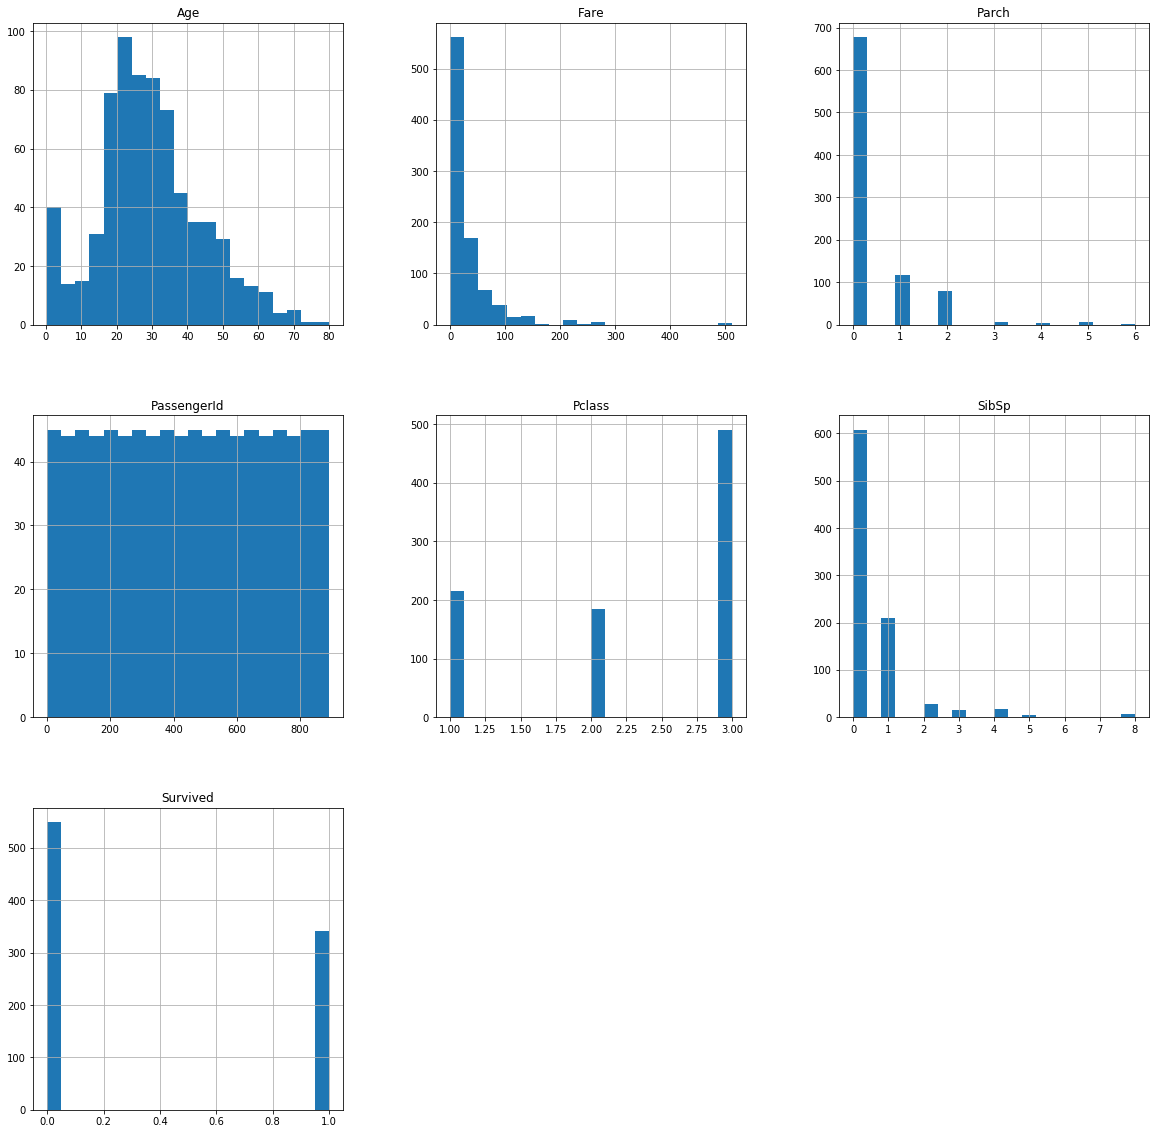

In [16]:
train_data.hist(figsize = (20,20), bins=20)

In [17]:
train_id = train_data['PassengerId']
corr_matrix = train_data.corr()
corr_matrix['Survived'].sort_values(ascending = False) 

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

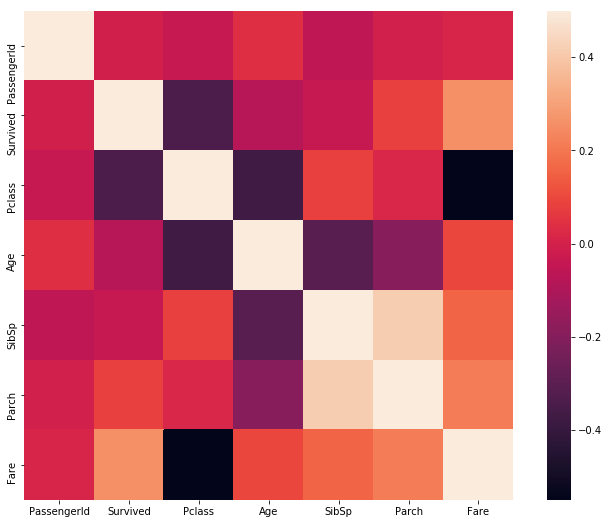

In [18]:
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix,vmax=.5,square=True)

# **Observations from EDA**

The age feature has some values that are 0 and we have to figure out whether to drop those values or just fill them with the median. Or do we turn it into a categorical dtype (Child,Adult) and encode it later? 

The fares feature has a high correlation with the survival rate but that is expected. We noticed earlier that the higher class people had a higher survival rate. 

The Parch feature has mainly 0's so we might be able to remove that feature and the same with SibSp.

Now we have to figure out what to do with the age feature.

# **Decisions so far**

The cabin feature can be removed, there are so many values that aren't recorded. The only values that are recorded are for the first class passengers which could show a small correlation. A possible fix is to change the Cabin to Yes/No feature. 

I can possibly discard Embarked.

Parch and SibSp contain many 0's I should either discard it or combine it into another feature. 

Need to encode Sex and check correlation.

OneHotEncode Pclass and check correlation.

In [19]:
train_data['Name'].value_counts()

Karun, Miss. Manca                                       1
Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)        1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)         1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)      1
Collander, Mr. Erik Gustaf                               1
Najib, Miss. Adele Kiamie "Jane"                         1
Crosby, Miss. Harriet R                                  1
Canavan, Miss. Mary                                      1
Bengtsson, Mr. John Viktor                               1
Newell, Miss. Madeleine                                  1
Doharr, Mr. Tannous                                      1
Sawyer, Mr. Frederick Charles                            1
Ohman, Miss. Velin                                       1
Palsson, Master. Gosta Leonard                           1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)      1
Adams, Mr. John                                          1
Chapman, Mr. John Henry                                 

In [55]:
def change_sex(dataframe):
    dataframe['Sex'] = dataframe['Sex'].map({'female': 0, 'male':1 }).astype('int64')
    return dataframe

In [56]:
train_data_copy = train_data.copy()

In [57]:
train_data_copy = change_sex(train_data_copy)

In [58]:
corr_matrix = train_data_copy.corr()
corr_matrix['Survived'].sort_values(ascending = False) 

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

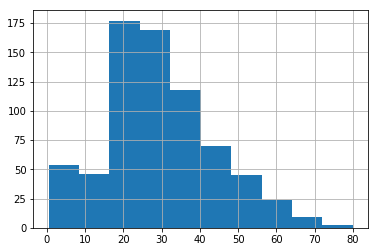

In [59]:
train_data_copy['Age'].hist()

# **Creating our first model**

Just to test out our model I'll get rid of only two columns:
* Cabin
* Ticket
We'll convert the Embark column into dummy varibales with pd.get_dummies and train our models using that data.

Let's create some classes that will transform our data so we can train it easily

In [92]:
#select the number columns and categorical columns
num_attr = train_data_copy.select_dtypes([np.int64,np.float64]).columns.values
cat_attr = train_data_copy.select_dtypes([object]).columns.values

#First iteration 
#cat_drop_cols = ['Ticket','Cabin','Name']
#train_drop_cols = ['PassengerId','Survived']

#Let's try to add the HasCabin class in
cat_drop_cols = ['Ticket','Name','Cabin']
train_drop_cols = ['PassengerId','Survived']


In [90]:
#Let's convert the cabin to a new column to HasCabin
def has_cabin(dataframe):
    dataframe['HasCabin'] = dataframe['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    return dataframe

In [91]:

train_data_copy.drop()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [93]:
from sklearn.base import TransformerMixin,BaseEstimator
#selects columns
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attr = []):
        self.attr = attr
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.loc[:,self.attr]

In [94]:
class DropColumns(BaseEstimator,TransformerMixin):
    def __init__(self,drop_cols=[]):
        self.drop_cols = drop_cols
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X= X.copy()
        return X.drop(self.drop_cols,axis=1)

In [95]:
from sklearn.pipeline import Pipeline,FeatureUnion

num_pipeline = Pipeline([
    ('selection', DataFrameSelector(num_attr)),
    ('drop',DropColumns(train_drop_cols)),
    ('impute',SimpleImputer())
])

cat_pipeline = Pipeline([
    ('selection',DataFrameSelector(cat_attr)),
    ('drop',DropColumns(cat_drop_cols)),
    ('impute',SimpleImputer(strategy = 'most_frequent')),
    ('encode',OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

full_pipeline = FeatureUnion([
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [89]:
train_data_copy = train_data.copy()

In [96]:
train_data_copy = change_sex(train_data_copy)
train_data_copy = has_cabin(train_data_copy)

In [97]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
HasCabin       891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 76.6+ KB


In [98]:
survived_train = train_data_copy['Survived']

In [99]:
train_data_cleaned = pd.DataFrame(full_pipeline.fit_transform(train_data_copy))

In [127]:
train_data_cleaned

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
5,3.0,29.699118,0.0,0.0,8.4583,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,54.000000,0.0,0.0,51.8625,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,2.000000,3.0,1.0,21.0750,0.0,0.0,1.0,0.0,0.0,1.0
8,3.0,27.000000,0.0,2.0,11.1333,0.0,1.0,0.0,0.0,0.0,1.0
9,2.0,14.000000,1.0,0.0,30.0708,0.0,1.0,0.0,1.0,0.0,0.0


In [101]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [102]:
#cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)


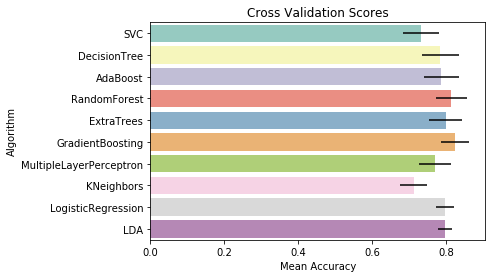

In [103]:
# Modeling step to test different algorithms

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results =[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,train_data_cleaned,y=survived_train,scoring="accuracy",cv=kfold,n_jobs=4))
    
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValErrors':cv_std,'Algorithm':['SVC', 'DecisionTree','AdaBoost','RandomForest','ExtraTrees','GradientBoosting','MultipleLayerPerceptron','KNeighbors','LogisticRegression','LDA']})

g =sns.barplot('CrossValMeans','Algorithm', data=cv_res,palette='Set3',orient='h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross Validation Scores')

In [125]:
# ada boosted decision tree classifier

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC,random_state=7)

ada_param_grid = {'base_estimator__criterion':['gini','entropy'],
                 'base_estimator__splitter': ['best','random'],
                 'algorithm':['SAMME','SAMME.R'],
                 'n_estimators':[1,2],
                 'learning_rate' : [0.0001,0.001,0.01,0.1,0.2,0.2,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid= ada_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)

gsadaDTC.fit(train_data_cleaned,survived_train)
ada_best= gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 756 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    2.5s finished
c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [126]:
gsadaDTC.best_score_

0.8047138047138047

In [106]:
ExtraTreesClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [107]:
#Extra Trees

ExtC = ExtraTreesClassifier()

#search for optimal params

ex_param_grid = {'max_depth':[None],
                'max_features':[1,3,10],
                'min_samples_split':[2,3,10],
                'min_samples_leaf':[1,3,10],
                'bootstrap':[False],
                'n_estimators': [100,300],
                'criterion':['gini']}

gsExtC = GridSearchCV(ExtC,param_grid=ex_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)

gsExtC.fit(train_data_cleaned,survived_train)

ExtC_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   20.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   32.1s finished


0.8316498316498316

In [108]:
# Random forest classifier

RFC =  RandomForestClassifier()

rf_param_grid = {'max_depth':[None],
                'max_features':[1,3,9],
                'min_samples_split':[2,3,9],
                'min_samples_leaf': [1,3,9],
                'bootstrap' : [False],
                'n_estimators':[100,300],
                'criterion':['gini']}
gsRFC = GridSearchCV(RFC,param_grid=rf_param_grid, cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)

gsRFC.fit(train_data_cleaned,survived_train)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   42.1s finished


0.8260381593714927

In [128]:
GBC = GradientBoostingClassifier()

gb_param_grid = {'loss':['deviance'],
                'n_estimators': [100,200,300],
                'learning_rate': [0.1,0.05,0.01],
                'max_depth':[4,8],
                'min_samples_leaf': [100,150],
                'max_features': [ 0.3, 0.1]
                }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid,cv=kfold,scoring='accuracy',n_jobs = 4,verbose =1)

gsGBC.fit(train_data_cleaned,survived_train)

GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   16.3s finished


0.8226711560044894

In [130]:
SVMC = SVC(probability=True)

svc_param_grid = {'kernel':['rbf'],
                 'gamma': [0.001,0.01,0.1,1],
                 'C': [1,10,50,100,200,300,1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid,cv=kfold,scoring='accuracy',n_jobs=4,verbose=1)

gsSVMC.fit(train_data_cleaned,survived_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   25.4s finished
c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8080808080808081

# **Ensemble modeling**

In [133]:
votingC = VotingClassifier(estimators = [('rfc',RFC_best),('extc',ExtC_best),('adac',ada_best),('svc',SVMC_best),('gbc',GBC_best)],voting ='soft',n_jobs=4)

votingC = votingC.fit(train_data_cleaned,survived_train)

In [134]:
test = load_data(test_file)

In [135]:
test_id = test['PassengerId']

In [136]:
test_cleaned = change_sex(test)
test_cleaned = has_cabin(test_cleaned)
test_cleaned = pd.DataFrame(full_pipeline.fit_transform(test_cleaned))

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [137]:
test_survived = pd.DataFrame({'PassengerId':test_id,'Survived':votingC.predict(test_cleaned)})

In [123]:
test_survived

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [138]:
test_survived.to_csv('titanic.csv',index=False)